In [104]:
import pandas as pd

In [105]:
df = pd.read_csv('/Users/benkaufman/Desktop/lottery_sales/Data-Table 1.csv')

In [106]:
df = df.drop("Unnamed: 4", 1)

In [107]:
df.head()

,City or town,Population,Unrestricted General Government Aid,Gross lottery sales
0,BOSTON,"617,594","$160,247,301.00","$535,596,750.50"
1,WORCESTER,"181,045","$35,150,026.00","$150,438,334.25"
2,SPRINGFIELD,"153,060","$32,020,398.00","$111,525,910.75"
3,LOWELL,"106,519","$21,304,471.00","$78,631,270.50"
4,CAMBRIDGE,"105,162","$18,170,690.00","$45,304,328.50"


In [108]:
df.dtypes

City or town                           object
Population                             object
Unrestricted General Government Aid    object
Gross lottery sales                    object
dtype: object

In [109]:
# Some cleanup (thanks Stack Overflow)
import decimal
D = decimal.Decimal

df['City or town'] = df['City or town'].str.strip()

df['Population'] = (df['Population'].str.replace(r'[^-+\d.]', '').astype(D))

df['Unrestricted General Government Aid'] = (df['Unrestricted General Government Aid']
                                             .str.replace(r'[^-+\d.]', '').astype(D))

df['Gross lottery sales'] = (df['Gross lottery sales']
                             .str.replace(r'[^-+\d.]', '').astype(D))

In [110]:
df.head()

,City or town,Population,Unrestricted General Government Aid,Gross lottery sales
0,BOSTON,617594,160247301.00,535596750.50
1,WORCESTER,181045,35150026.00,150438334.25
2,SPRINGFIELD,153060,32020398.00,111525910.75
3,LOWELL,106519,21304471.00,78631270.50
4,CAMBRIDGE,105162,18170690.00,45304328.50


In [111]:
df2 = pd.read_csv('/Users/benkaufman/Desktop/lottery_sales/household_income.csv')

In [112]:
df2 = df2.dropna(axis=1,how='all')
df2['City or town'] = df2['City or town'].str.upper()
df2['City or town'] = df2['City or town'].str.strip()

df2['Per Capita Income'] = (df2['Per Capita Income'].str.replace(r'[^-+\d.]', '').astype(D))
df2['Median Household Income'] = (df2['Median Household Income'].str.replace(r'[^-+\d.]', '').astype(D))

In [113]:
df2.head()

,City or town,Per Capita Income,Median Household Income
0,WESTON,105217,192563
1,DOVER,89476,187829
2,CARLISLE,77585,160034
3,SHERBORN,73420,153444
4,SUDBURY,72744,170924


In [155]:
res = df.merge(df2, on='City or town')
res['Population'] = res['Population'].astype(int)
res['Unrestricted General Government Aid'] = res['Unrestricted General Government Aid'].convert_objects(convert_numeric=True)
res['Gross lottery sales'] = res['Gross lottery sales'].convert_objects(convert_numeric=True)
res['Per Capita Income'] = res['Per Capita Income'].astype(int)
res['Median Household Income'] = res['Median Household Income'].astype(int)
res['Money Spent on Lottery Per Person'] = res['Gross lottery sales'] / res['Population']

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [156]:
res.dtypes

City or town                            object
Population                               int64
Unrestricted General Government Aid    float64
Gross lottery sales                    float64
Per Capita Income                        int64
Median Household Income                  int64
Money Spent on Lottery Per Person      float64
dtype: object

In [157]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
corr = res.corr()
#corr = res['Gross lottery sales'].corr(res['Median Household Income'])
corr

,Population,Unrestricted General Government Aid,Gross lottery sales,Per Capita Income,Median Household Income,Money Spent on Lottery Per Person
Population,1.000000,0.974717,0.977288,-0.084663,-0.120636,0.140032
Unrestricted General Government Aid,0.974717,1.000000,0.968445,-0.126027,-0.161272,0.113001
Gross lottery sales,0.977288,0.968445,1.000000,-0.174911,-0.218194,0.262410
Per Capita Income,-0.084663,-0.126027,-0.174911,1.000000,0.859222,-0.364456
Median Household Income,-0.120636,-0.161272,-0.218194,0.859222,1.000000,-0.376065
Money Spent on Lottery Per Person,0.140032,0.113001,0.262410,-0.364456,-0.376065,1.000000


In [159]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

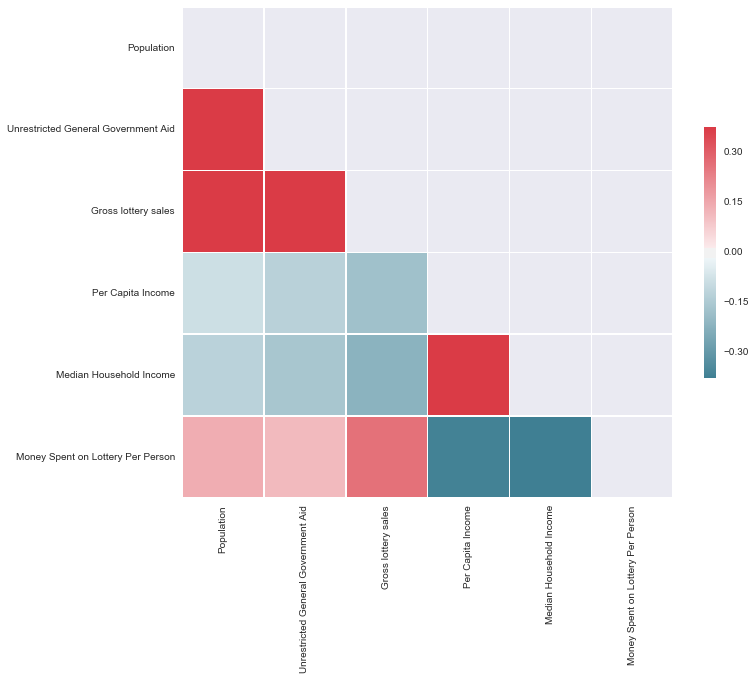

In [160]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [148]:
%matplotlib inline

In [164]:
res[res['Unrestricted General Government Aid'] > res['Gross lottery sales']]

,City or town,Population,Unrestricted General Government Aid,Gross lottery sales,Per Capita Income,Median Household Income,Money Spent on Lottery Per Person
40,AMHERST,37819,7120842,6412846.00,19796,53191,169.566779
221,LINCOLN,6362,575819,87266.00,62061,126395,13.716756
281,HUNTINGTON,2180,291504,164493.00,27331,55526,75.455505
287,CONWAY,1897,151164,31062.00,37737,77143,16.374275
296,CLARKSBURG,1702,307692,48021.00,28274,57600,28.214454
299,GRANVILLE,1566,135608,116719.75,30474,73795,74.533685
301,GILL,1500,205734,51510.50,34215,74583,34.340333
308,ROYALSTON,1258,152063,144682.50,27999,60750,115.009936
313,WORTHINGTON,1156,106245,90400.50,34898,68882,78.201125
327,HANCOCK,717,47754,28716.50,31535,79438,40.050907


# Questions to answer to reach conclusion:

* Problems associated with gambling
* Crime rates
* Education (exploiting stupid people)
* Income (shown)
* Redistribution of wealth to the wealthy, is that fair or is that good?
* Where will the money now go (hopefully better uses not drugs/alcohol)
* Do people go from drug abuse to gambling addiction or vice-versa?
    * is association good enough? if they lead to each other banning 1 is not bad
* If you ban gambling will people turn to drugs/alcohol? Which is the lesser of the 2 evils?
    * look at rates when gambling was banned and legal, also look at social projects implemented
* How do towns spend aid money? What will pay for services funded by lottery?
* Effect of Dissolving lottery? How many people work for it?
* Probably other stuff...to be determined...
* Card games are more enjoyment and SOCIAL you play with other people rather than 

* gambling promotes alcoholism, free drinks while gambling
http://www.readcube.com/articles/10.1111%2Fj.1530-0277.1986.tb05610.x?r3_referer=wol&tracking_action=preview_click&show_checkout=1&purchase_referrer=onlinelibrary.wiley.com&purchase_site_license=PUBLICATION_OUTSIDE_OF_LICENSE_PERIOD

* addiction severity index (lesser of evils)
http://www.readcube.com/articles/10.1111%2Fj.1360-0443.1991.tb01863.x?r3_referer=wol&tracking_action=preview_click&show_checkout=1&purchase_referrer=onlinelibrary.wiley.com&purchase_site_license=PUBLICATION_OUTSIDE_OF_LICENSE_PERIOD

* binge eating, problem drinking, gambling addiction
http://ac.els-cdn.com/S0191886907003510/1-s2.0-S0191886907003510-main.pdf?_tid=b48d86f8-9df5-11e5-a378-00000aab0f27&acdnat=1449611612_8a97b92c861381ba7d59e06bcf76e0d6